In [ ]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


**Bài tập**

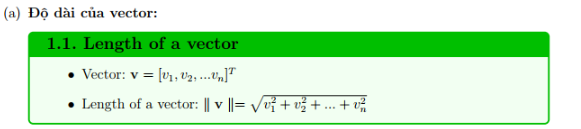

In [ ]:
import numpy as np
import math

def compute_vector_length(vector):
    return math.sqrt(np.dot(vector, vector)) # vector @ vector

vector = np.array([3,4])
print(np.linalg.norm(vector))

# print(np.einsum('i,i -> i',vector, vector))

assert compute_vector_length(vector) == np.linalg.norm(vector)

5.0
[ 9 16]


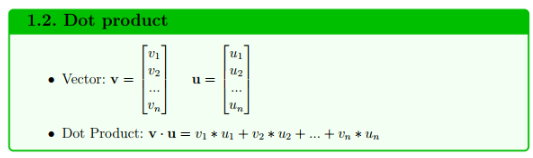

In [ ]:
def compute_dot_product(v1, v2):
    return v1@v2

v1 = np.array([0 , 1, -1, 2])
v2 = np.array([2 , 5, 1, 0])
result = compute_dot_product(v1 , v2)
print(round(result ,2))

4


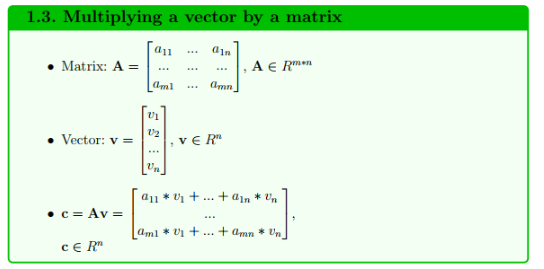

In [ ]:
def matrix_multi_matrix(m1 , m2):
    return m1@m2

m1 = np.array([[0 , 1, 2], [2, -3, 1]])
m2 = np.array([[1 , -3] ,[6 , 1], [0, -1]])
result = matrix_multi_matrix(m1 , m2)
print( result )

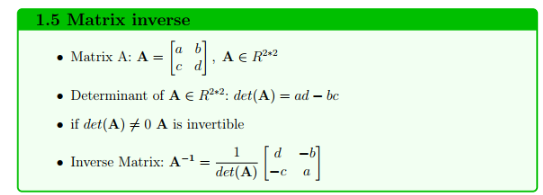

In [ ]:
def inverse_matrix(matrix):
    """
    Tính nghịch đảo của ma trận matrix.
    """
    try:
        inv_matrix = np.linalg.inv(matrix)
        return inv_matrix

    except np.linalg.LinAlgError:
        print("Ma trận không khả nghịch.")
        return None

m = np.array([[ -2 , 6], [8, -4]])
result = inverse_matrix(m)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


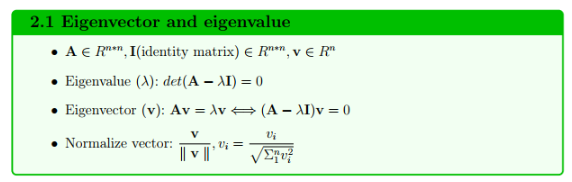

In [ ]:
def compute_eigenvalues_eigenvectors(matrix):
    """  Tính giá trị riêng eigenvalues, vectơ riêng eigenvectors của ma trận matrix """
    try:
        eigenvalues, eigenvectors = np.linalg.eig(matrix)
        return eigenvalues, eigenvectors
    except np.linalg.LinAlgError:
        print("Ma trận không có giá trị riêng.")
        return None
matrix = np. array ([[0.9 , 0.2] , [0.1 , 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print( eigenvectors )

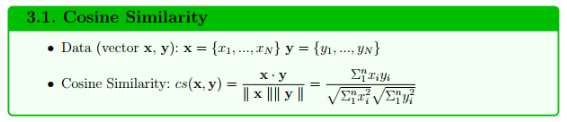

In [ ]:
def compute_cosine(x , y):
    """  Tính cosine """
    try:
        return np.abs(x@y)/(np.linalg.norm(x)*np.linalg.norm(y))
    except np.linalg.LinAlgError:
        print("Không nhân được.")
        return None

x = np. array ([1 , 2, 3, 4])
y = np. array ([1 , 0, 3, 0])
result = compute_cosine(x,y)
print(round (result , 3))

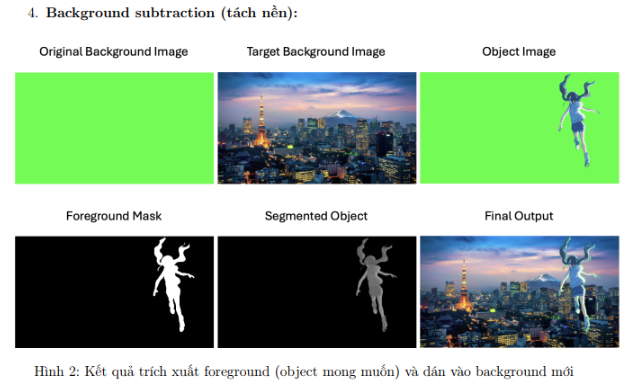

In [ ]:
%pip install opencv-python

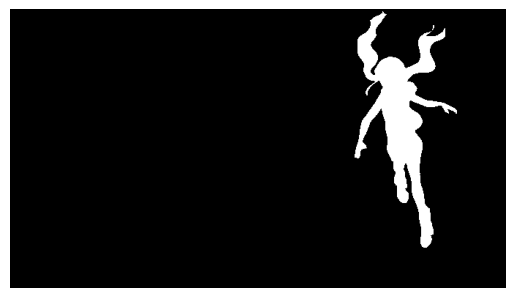

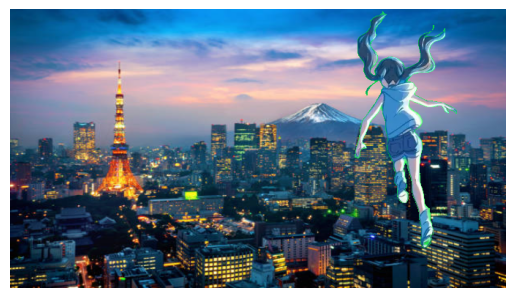

In [ ]:
import cv2
import numpy as np

# Đọc các ảnh đầu vào
original_bg = cv2.imread('/content/GreenBackground.png') # origin backgroud
target_bg = cv2.imread('/content/NewBackground.jpg')     # target backgroud
object_img = cv2.imread('/content/Object.png')           # object moving

# Đưa các ảnh về cùng kích thước
height, width = object_img.shape[:2]
target_bg  = cv2.resize(target_bg, (width, height))
object_img = cv2.resize(object_img, (width, height))


# ---------Cách 1:------------
# Tạo mask của object bằng kỹ thuật background subtraction
fg_mask = cv2.absdiff(object_img, original_bg)
fg_mask = cv2.cvtColor(fg_mask, cv2.COLOR_BGR2GRAY)
_, fg_mask = cv2.threshold(fg_mask, 10, 255, cv2.THRESH_BINARY)


# Tạo ảnh output
output_img = np.where(fg_mask[:, :, np.newaxis] == 255, object_img, target_bg)
# ---------Cách 1:------------

# ## ---------Cách 2:------------
# # Chuyển đổi ảnh về không gian màu HSV để dễ dàng xử lý màu nền xanh lá
# hsv_object_img = cv2.cvtColor(object_img, cv2.COLOR_BGR2HSV)

# # Tạo mask để xác định vùng nền xanh lá
# lower_green = np.array([35, 100, 100])
# upper_green = np.array([85, 255, 255])
# mask = cv2.inRange(hsv_object_img, lower_green, upper_green)

# # Lấy vùng foreground từ object image
# foreground = cv2.bitwise_and(object_img, object_img, mask=cv2.bitwise_not(mask))

# # Lấy vùng background từ target background image
# background = cv2.bitwise_and(target_bg, target_bg, mask=mask)

# # Kết hợp foreground và background để tạo ảnh output
# output_img = cv2.add(foreground, background)
# ## -----------Cách 2:------------


# Lưu ảnh output
cv2.imwrite('output_image.jpg', output_img)

# Hiển thị ảnh output
# cv2.imshow('Output Image', output_img) //-> không được hỗ trợ tron coblab
# cv2.waitKey(0)
# cv2.destroyAllWindows()

import matplotlib.pyplot as plt

# Hiển thị ảnh output trên Google Colab
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Tắt trục tọa độ
plt.show()


# **TRẮC NGHIỆM**

In [ ]:
# Q1:
import numpy as np
import math

def compute_vector_length(vector):
    return math.sqrt(np.dot(vector, vector))


vector1 = np.array([3,4])

assert compute_vector_length(vector1) == 5
print(compute_vector_length(vector1))

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result ,2))

5.0
23.28


In [ ]:
#Q2:
import numpy as np

def compute_dot_product(v1, v2):
    return np.dot(v1, v2)

v1 = np.array([0 , 1, -1, 2])
v2 = np.array([2 , 5, 1, 0])
result = compute_dot_product(v1 , v2)
print(round(result ,2))

4


In [ ]:
#Q3:
x = np.array([[1 , 2],
              [3, 4]])
k = np.array([1 , 2])
print('result \n', x.dot (k))

result 
 [ 5 11]


In [ ]:
#Q4:
x = np.array ([[ -1 , 2],
                [3, -4]])
k = np.array ([1 , 2])
print ('k transpose', np.transpose(k),k)
y = np.array ([[ 1 , 2],
                [3, 4]])
print ('\nresult ', x@k)
print ('\nresult ', x@y)
print ('\nresult ', x@np.transpose(k))

k transpose [1 2] [1 2]

result  [ 3 -5]

result  [[  5   6]
 [ -9 -10]]

result  [ 3 -5]


In [ ]:
#Q5:
def matrix_multi_vector(matrix, vector):
    return matrix@vector

m = np.array([[ -1 , 1, 1], [0, -4, 9]])
v = np.array([0 , 2, 1])
result = matrix_multi_vector(m, v)
print( result )

[3 1]


In [ ]:
#Q6:
def matrix_multi_matrix(m1 , m2):
    return m1@m2

m1 = np.array([[0 , 1, 2], [2, -3, 1]])
m2 = np.array([[1 , -3] ,[6 , 1], [0, -1]])
result = matrix_multi_matrix(m1 , m2)
print( result )

[[  6  -1]
 [-16 -10]]


In [ ]:
#Q7:
m1 = np.eye(3)
m2 = np. array([[1 , 1, 1] ,[2 , 2, 2], [3, 3, 3]])
result = m1@m2
print( result )

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [ ]:
#Q8:
m1 = np.eye(2)

m1 = np.reshape(m1 ,(-1 ,4))[0]
print('m1 -> ', m1, (np.reshape(m1 ,( -1 ,4))).shape)

m2 = np.array([[1 , 1, 1, 1] ,[2 , 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)


m1 ->  [1. 0. 0. 1.] (1, 4)
[5. 5. 5. 5.]


In [ ]:
#Q9:
m1 = np.array ([[1 , 2], [3, 4]])
m1 = np.reshape (m1 ,( -1 ,4) , "F")[0]
m2 = np.array ([[1 , 1, 1, 1] ,[2 , 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print( result )

[29 29 29 29]


In [ ]:
# Q10:
def inverse_matrix(matrix):
    """
    Tính nghịch đảo của ma trận matrix.

    Args:
    matrix (numpy.ndarray): Ma trận cần tính nghịch đảo.

    Returns:
    numpy.ndarray: Nghịch đảo của ma trận m1.
    """
    try:
        inv_matrix = np.linalg.inv(matrix)
        return inv_matrix
    except np.linalg.LinAlgError:
        print("Ma trận không khả nghịch.")
        return None

m1 = np.array([[ -2 , 6], [8, -4]])
result = inverse_matrix(m1)
print( result )

[[0.1  0.15]
 [0.2  0.05]]


In [ ]:
#Q11:
def compute_eigenvalues_eigenvectors(matrix):
    """  Tính giá trị riêng eigenvalues, vectơ riêng eigenvectors của ma trận matrix """
    try:
        eigenvalues, eigenvectors = np.linalg.eig(matrix)
        return eigenvalues, eigenvectors
    except np.linalg.LinAlgError:
        print("Ma trận không có giá trị riêng.")
        return None
matrix = np. array ([[0.9 , 0.2] , [0.1 , 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print( eigenvectors )

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [ ]:
#Q12:
def compute_cosine(x , y):
    """  Tính cosine """
    try:
        return np.abs(x@y)/(np.linalg.norm(x)*np.linalg.norm(y))
    except np.linalg.LinAlgError:
        print("Không nhân được.")
        return None

x = np. array ([1 , 2, 3, 4])
y = np. array ([1 , 0, 3, 0])
result = compute_cosine(x,y)
print(round (result , 3))

0.577
